# Exercise 6.18
### Introduction
This will find the maximum efficiency of a lightbulb using golden ratio search. 
$$ \eta = {15 \over \pi^4} \int_{hc/\lambda _2 k_B T}^{hc/\lambda _1 k_B T} {x^3 \over e^x -1} dx$$

The maximum is at 6929 of η = 0.4517


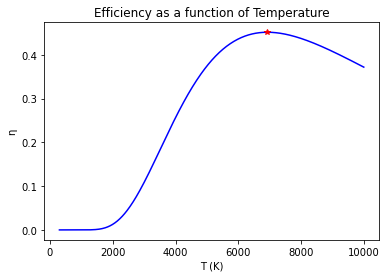

In [21]:
# Part A using gaussian quadrature with 100 points
from gaussxw import gaussxw
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x**3/(np.exp(x)-1)

def gauss_integral(T):
    N = 100
    a = h*c/lam2/kb/T
    b = h*c/lam1/kb/T

    x,w = gaussxw(N)
    xp = 0.5*(b-a)*x+0.5*(b+a)
    wp = 0.5*(b-a)*w

    s = 0
    for k in range(N):
        s += wp[k]*f(xp[k])
    return s*15/np.pi**4

Vint = np.vectorize(gauss_integral)
h = 6.6260715e-34
c = 299792458
lam1 = 390e-9
lam2 = 750e-9
kb = 1.380649e-23
temps = np.linspace(300,10000,500)
plt.title('Efficiency as a function of Temperature')
plt.ylabel('η')
plt.xlabel('T (K)')
plt.plot(temps,Vint(temps),'b-')

# Part B Golden Ratio Search
temp = 5000
accuracy = 1
z = (1 + np.sqrt(5))/2        # Golden ratio

x1 = temp/10
x4 = temp * 1.9
x2 = x4- (x4-x1)/z
x3 = x1+(x4-x1)/z

f1 = gauss_integral(x1)
f2 = gauss_integral(x2)
f3 = gauss_integral(x3)
f4 = gauss_integral(x4)

while x4-x1 > accuracy:
    if f2>f3:
        x4,f4 = x3,f3
        x3,f3 = x2, f2
        x2 = x4 - (x4-x1)/z
        f2 = gauss_integral(x2)
    else:
        x1,f1 = x2,f2
        x2, f2 = x3,f3
        x3 = x1 + (x4-x1)/z
        f3 = gauss_integral(x3)
        
print(f'The maximum is at {0.5 * (x1+x4) :.0f} of η = {gauss_integral(0.5 * (x1+x4)):.4f}')
plt.plot(0.5 * (x1+x4),gauss_integral(0.5 * (x1+x4)),'r*')

plt.show()

### Conclusion
No it is not practical to run it at that temperature. If it was, everything around it would burn. And it takes a lot of energy to get to that temperature. 

Overall, I really enjoyed this. I had fun making a function to do gaussian quadrature. The only change I had to make to the code he gave us was the if statement in the while loop.